In [26]:
# BiocManager::install("pheatmap")

In [1]:
library(pheatmap)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#### 测试数据

In [15]:
test = matrix(rnorm(200), 20, 10)
test[1:10, seq(1, 10, 2)] = test[1:10, seq(1, 10, 2)] + 3
test[11:20, seq(2, 10, 2)] = test[11:20, seq(2, 10, 2)] + 2
test[15:20, seq(2, 10, 2)] = test[15:20, seq(2, 10, 2)] + 4
colnames(test) = paste("Test", 1:10, sep = "")
rownames(test) = paste("Gene", 1:20, sep = "")
head(test)

,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,Test10
Gene1,1.963583,-2.1138052,4.729736,-1.7047158,3.548048,0.7668634,3.309883,-2.2749410,4.329132,-0.35583049
Gene2,2.688076,-1.6100822,2.013102,1.2448350,3.514373,-0.7145726,3.759688,1.1312050,2.436723,-0.02016335
Gene3,3.139379,0.3525153,1.862346,-0.2281366,3.324517,-0.1326728,1.175249,-0.6625382,2.130712,-0.21551089
Gene4,4.951863,-1.6270855,3.196431,0.5198499,4.476891,1.9207457,3.275201,0.4957330,3.290812,0.30032274
Gene5,1.651769,1.1035290,4.176800,-0.3062016,1.373428,-0.1111458,3.837039,0.4196408,1.823844,1.30412381
Gene6,3.266048,1.3313924,3.501638,0.3575204,2.163650,0.4028799,2.912169,0.9534790,2.791848,0.22139461


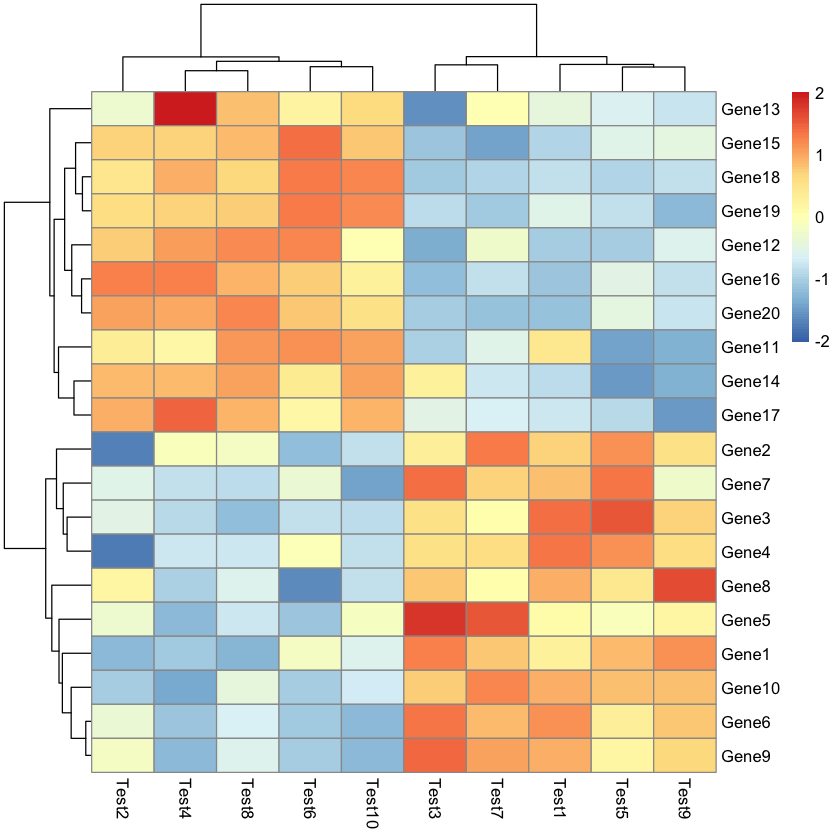

In [29]:
# options(repr.plot.width = 10, repr.plot.height = 10)
pheatmap(test, 
    # 图像尺寸设置
    width = 100, height = 100,
    scale = "row"
    )

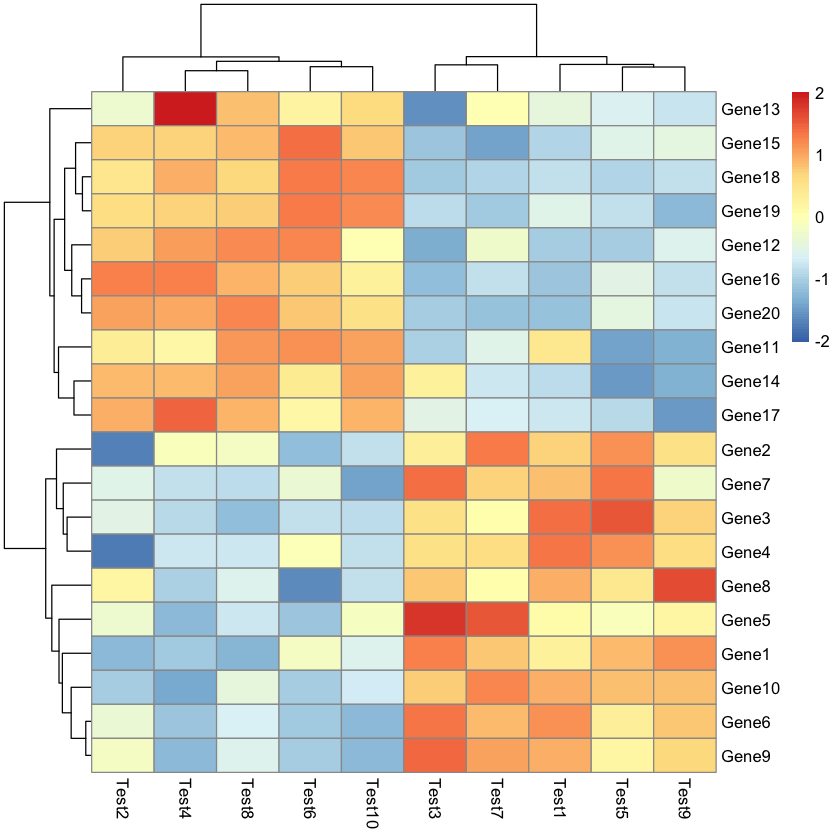

In [24]:
pheatmap(test, 
    scale = "row",
    clustering_method = "complete")

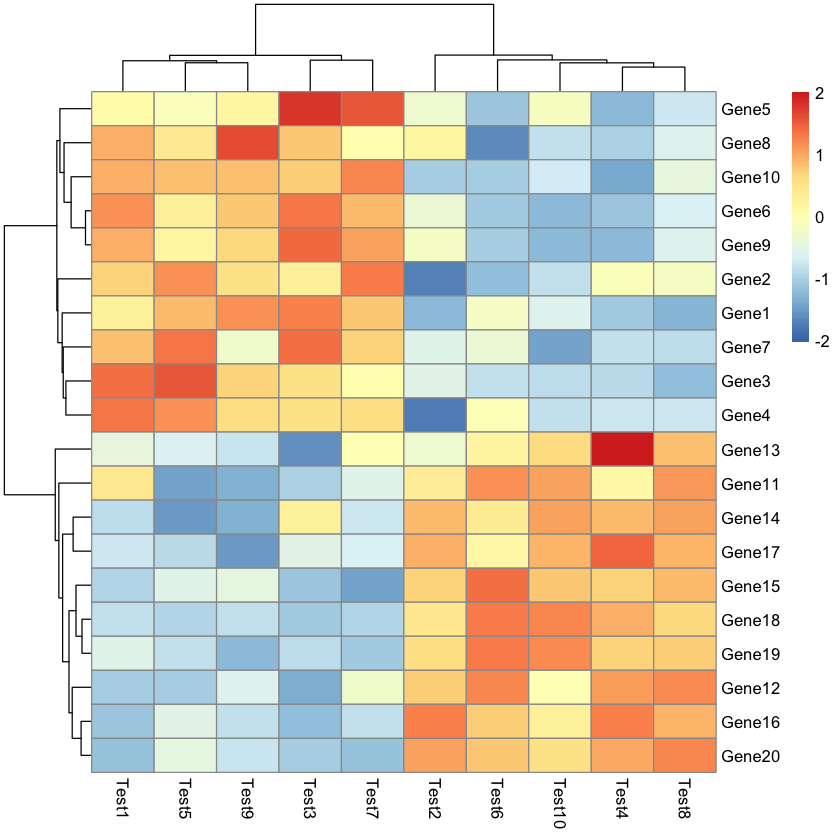

In [25]:
pheatmap(test, 
    scale = "row",
    clustering_method = "average")

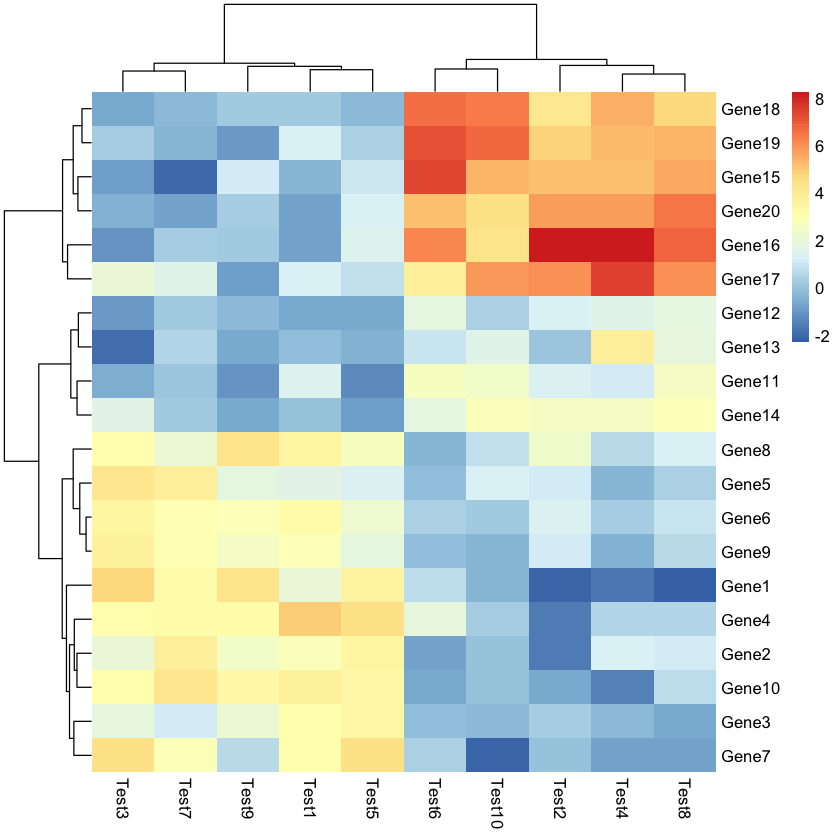

In [18]:
pheatmap(test, border=FALSE)

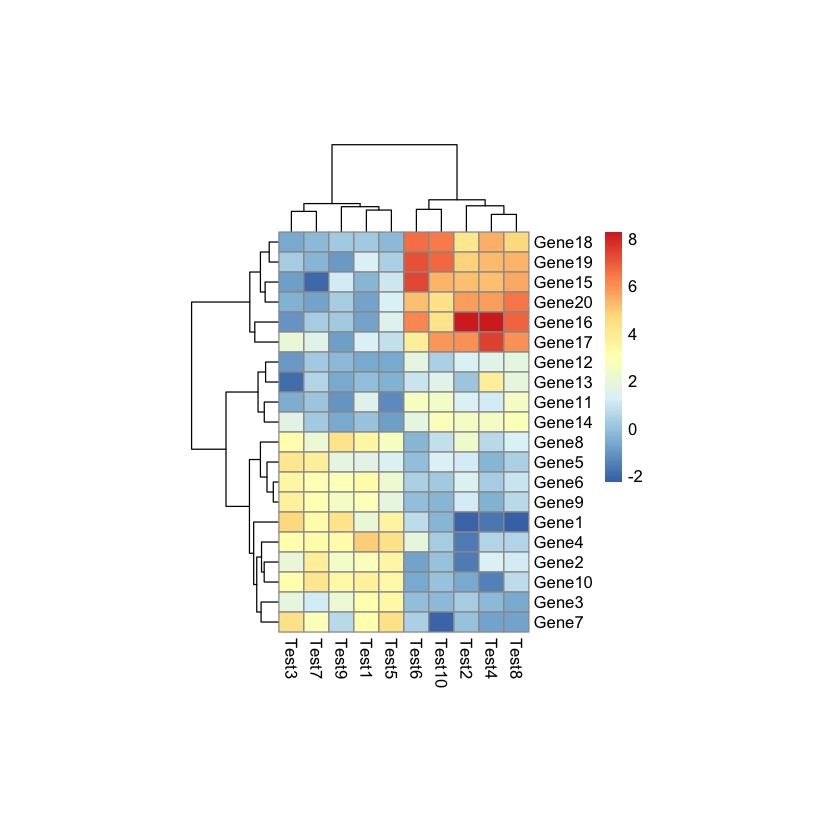

In [19]:
pheatmap(test, cellwidth = 15, cellheight = 12)

#### 孙涛师哥数据

In [31]:
expression_data <- read.csv("./ST-exp.csv", row.names = 1, header = TRUE)
# expression_data <- expression_data[complete.cases(expression_data),]
head(expression_data)

,F15.6,F25.1,F39.6,F48.7
,<dbl>,<dbl>,<dbl>,<dbl>
Mycth_59005,5876.80,761.53,72.12,28.83
Mycth_2312852,3360.19,2718.10,1864.76,1166.17
Mycth_49824,2608.60,958.49,2487.17,1660.39
Mycth_110651,2249.66,2623.56,1990.88,606.87
Mycth_112089,2100.76,1274.05,1735.85,930.01
Mycth_2295438,1923.80,1416.73,1132.39,1152.76


In [22]:
# 输出有多少行
nrow(expression_data)

[1] 119

In [2]:
library(readxl)
data <- read_excel("./ST-exp.xlsx", sheet = 2)
head(data)

GeneID,F15.6,F25.1,F39.6,F48.7
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mycth_2071628,0.15697279,3.407788,76.313932,157.706753
Mycth_98458,0.41740491,5.284355,247.345461,287.780073
Mycth_2124750,0.03130537,0.000000,1.097195,6.476213
Mycth_37844,0.51174100,1.910072,125.231971,104.994694
Mycth_100518,2.02564146,21.002436,290.311067,402.727389
Mycth_100838,4.84083008,213.522038,1522.425412,854.545805


In [3]:
library(readxl)
data <- read_excel("./ST-exp.xlsx", sheet = 1)
head(data)

GeneID,15.6h,25.1h,39.6h,48.7h
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mycth_2296904,0.07262405,11.4180927,1617.29260,2255.80892
Mycth_2297409,0.04372813,2.4782052,76.44373,139.91092
Mycth_2309773,0.55164314,51.7081824,1101.40281,1307.18907
Mycth_103671,0.01863919,0.6644714,31.27773,36.96853
Mycth_2300099,1.54478826,15.9915960,1639.64018,2419.98403
Mycth_2313023,0.17914633,14.9562203,221.78563,262.24811


In [13]:
data <- as.data.frame(data) # tibble不支持行名，需要转换为data.frame
row.names(data) <- data[,1]  # 将第一列设为行名
data <- data[,-1]            # 移除现在已经成为行名的第一列
head(data)

,15.6h,25.1h,39.6h,48.7h
,<dbl>,<dbl>,<dbl>,<dbl>
Mycth_2296904,0.07262405,11.4180927,1617.29260,2255.80892
Mycth_2297409,0.04372813,2.4782052,76.44373,139.91092
Mycth_2309773,0.55164314,51.7081824,1101.40281,1307.18907
Mycth_103671,0.01863919,0.6644714,31.27773,36.96853
Mycth_2300099,1.54478826,15.9915960,1639.64018,2419.98403
Mycth_2313023,0.17914633,14.9562203,221.78563,262.24811


In [23]:
# expression_data <- t(scale(t(expression_data)))

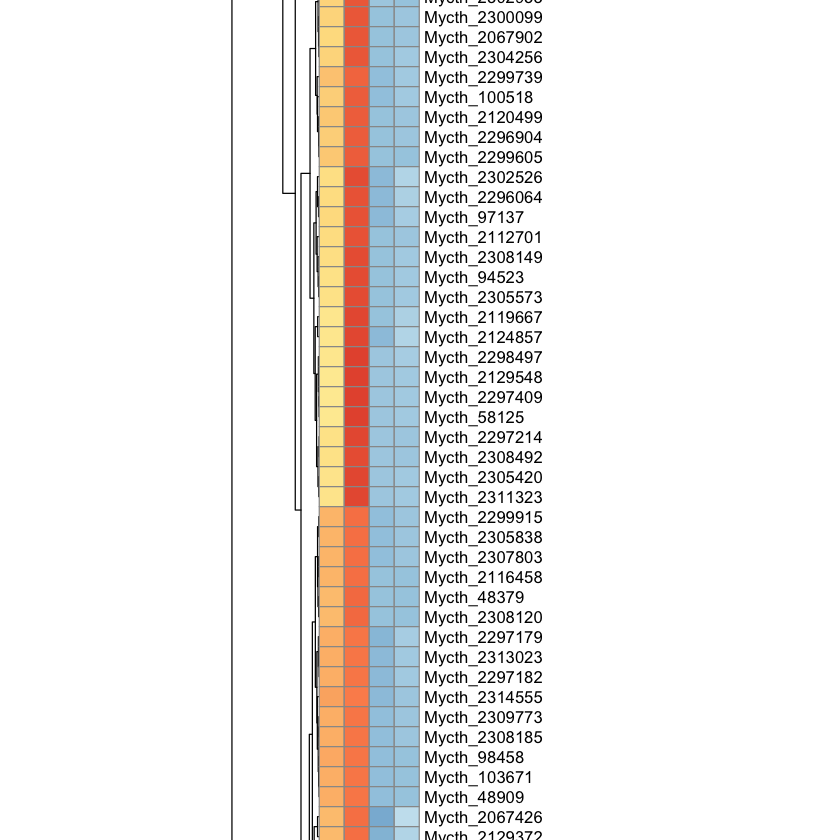

In [26]:
pheatmap(data,
        scale = "row", 
        cellwidth = 15, 
        cellheight = 12)